Interactive map with pie charts saved as 'station_traffic_with_piecharts.html'. Open it in a browser to view.


C:\Users\Fabian\AppData\Local\Temp\ipykernel_9040\2463086485.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Traffic_Ratio_Class', y='DWV_DNWV_Ratio', palette='Set2')


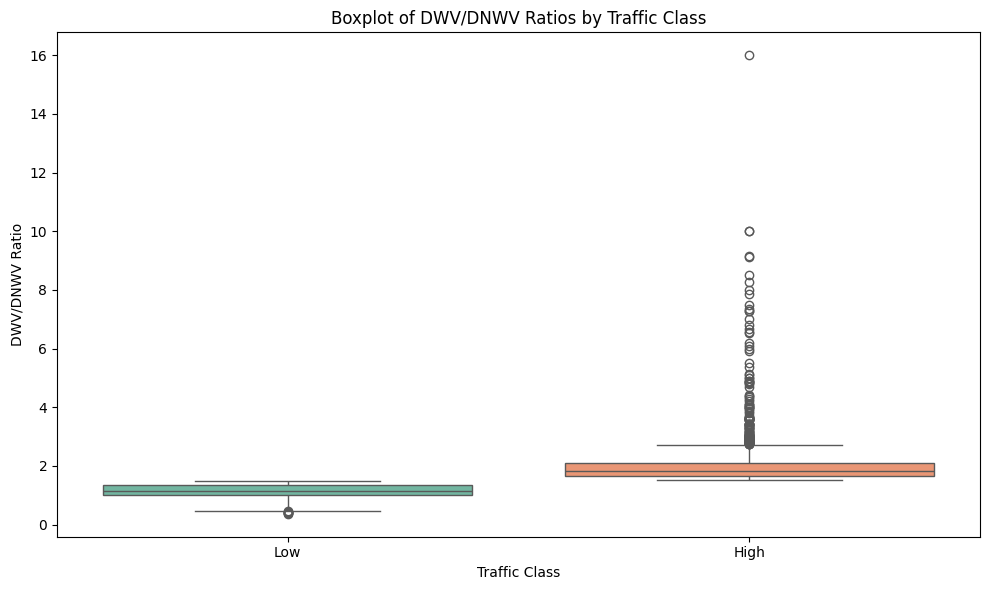

Geographical Visualization with Traffic Insights:
- Interactive map includes pie charts for DWV and DNWV proportions at each station.
- Boxplot shows the distribution of DWV/DNWV ratios by traffic class (High/Low).
- Open 'station_traffic_with_piecharts.html' to explore the interactive map.


In [4]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'data_prepared.csv'  # Replace with your actual CSV path
data = pd.read_csv(data_path)

# Preprocess the data
# Convert relevant columns to numeric if needed
for col in ['DWV', 'DNWV', 'lon', 'lat']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values in relevant columns
data = data.dropna(subset=['DWV', 'DNWV', 'lon', 'lat'])

# Feature Engineering: Calculate DWV/DNWV ratio
data['DWV_DNWV_Ratio'] = data['DWV'] / data['DNWV']

# Add a classification column: High weekday traffic ratio > 1.5
bins = [0, 1.5, float('inf')]
labels = ["Low", "High"]
data['Traffic_Ratio_Class'] = pd.cut(data['DWV_DNWV_Ratio'], bins=bins, labels=labels)

# Interactive Map: Add Pie Charts for Traffic Volume Proportions
station_map = folium.Map(location=[data['lat'].mean(), data['lon'].mean()], zoom_start=8)

for _, row in data.iterrows():
    popup = f"Station: {row['Code']}<br>DWV: {row['DWV']}<br>DNWV: {row['DNWV']}<br>Ratio: {row['DWV_DNWV_Ratio']:.2f}"
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=7,
        color='green' if row['Traffic_Ratio_Class'] == "High" else 'blue',
        fill=True,
        fill_color='green' if row['Traffic_Ratio_Class'] == "High" else 'blue',
        popup=popup
    ).add_to(station_map)

    # Add a pie chart marker for traffic proportions
    traffic_data = [row['DWV'], row['DNWV']]
    traffic_labels = ['DWV', 'DNWV']
    plt.figure(figsize=(2, 2))
    plt.pie(traffic_data, labels=traffic_labels, autopct='%1.1f%%', colors=['#4CAF50', '#2196F3'])
    plt.title(f"{row['Code']} Traffic")
    plt.tight_layout()
    plt.savefig(f"pie_{row['Code']}.png")
    plt.close()

    # Embed pie chart in the popup
    folium.Popup(
        f"<b>{row['Code']}</b><br><img src='pie_{row['Code']}.png' width='100%'><br>{popup}",
        max_width=300
    ).add_to(station_map)

# Save the interactive map
station_map.save('station_traffic_with_piecharts.html')
print("Interactive map with pie charts saved as 'station_traffic_with_piecharts.html'. Open it in a browser to view.")

# Additional Static Visualization: Boxplot for DWV/DNWV Ratios
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Traffic_Ratio_Class', y='DWV_DNWV_Ratio', palette='Set2')
plt.title('Boxplot of DWV/DNWV Ratios by Traffic Class')
plt.xlabel('Traffic Class')
plt.ylabel('DWV/DNWV Ratio')
plt.tight_layout()
plt.savefig('boxplot_traffic_ratios.png')
plt.show()

# Key Observations
print("Geographical Visualization with Traffic Insights:")
print("- Interactive map includes pie charts for DWV and DNWV proportions at each station.")
print("- Boxplot shows the distribution of DWV/DNWV ratios by traffic class (High/Low).")
print("- Open 'station_traffic_with_piecharts.html' to explore the interactive map.")
